# <font color =red>  IBM Applied Data Science Capstone - Debajyoti Mandal

# <font color=red> Introduction:

Road accidents are an unfortunate and unstoppable problem in our life and societies. The Global status report on road safety 2018, launched by WHO in December 2018, highlights that the number of annual road traffic deaths has reached 1.35 million.Every 25 seconds, one person died in road accidents. Road traffic injuries are now the leading killer of people aged 5-29 years. The burden is disproportionately borne by pedestrians, cyclists and motorcyclists, in particular those living in developing countries. The report suggests that the price paid for mobility is too high, especially because proven measures exist. Drastic action is needed to put these measures in place to meet any future global target that might be set and save lives. In this work,  I will try to build a model to predict the severity of an accident given the weather and the road conditions. When the road visibility and weather conditions are unfavourable this model will alert the car user.

## <font color=red> Business Understanding:


The local government of Seattle is trying to implement some method to alert the car user, police ,traffic system and health system about critical situations to reduce the death and injuries on the road. In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads. In an effort to avoid and reduce the frequency of these type of accidents, I will try to build a model to predict the severity of an accident given the weather and the road conditions. This way we would be able to bring awareness to the drivers and warn people about the possibility of getting into a car accident.  We would also be able to know the severity of the accident if it happens.


## <font color=red> Data Understanding:

The dataset we select has 194,673 rows and 37 different independent variables.We will use SEVERITY CODE as our dependent variable Y, with different independent variables X to identify the cause of road accidents and level of severity.The dataset are quite large, we need to filter out the missing value and delete the unrelated columns. Then we select the independent variables such as address type, weather, road condition, and light condition to compare with Y which may have more impact on the accidents.The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident . The code that corresponds to the severity of the collision:

● 3—fatality

● 2b—serious injury

● 2—injury

● 1—prop damage

● 0—unknown


#### Other important variables include:
❏ ADDRTYPE: Collision address type: Alley, Block, Intersection
❏ LOCATION: Description of the general location of the collision
❏ PERSONCOUNT: The total number of people involved in the collision helps
identify severity involved
❏ PEDCOUNT: The number of pedestrians involved in the collision helps identify
severity involved
❏ PEDCYLCOUNT: The number of bicycles involved in the collision helps identify
severity involved
❏ VEHCOUNT: The number of vehicles involved in the collision identify severity
involved
❏ INCDTTM : The date and time of the incident.
❏ JUNCTIONTYPE: Category of junction at which collision took place helps identify
where most collisions occur
❏ WEATHER: A description of the weather conditions during the time of the
collision
❏ ROADCOND: The condition of the road during the collision
❏ LIGHTCOND: The light conditions during the collision
❏ SPEEDING: Whether or not speeding was a factor in the collision (Y/N)
❏ SEGLANEKEY: A key for the lane segment in which the collision occurred
❏ CROSSWALKKEY: A key for the crosswalk at which the collision occurred
❏ HITPARKEDCAR: Whether or not the collision involved hitting a parked car

Furthermore, because of the existence of null values in some records, the data needs to be preprocessed before any further processing.

### <font color=blue> Let's understand the data in a bit more depth. We will also try to understand the impact of main attributes that cause road accidents.

#### <font color=blue> Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

#### <font color=blue> Downloading the data

In [2]:
! wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-24 06:30:47--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  35.8MB/s   in 2.0s   

2020-09-24 06:30:50 (35.8 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



#### <font color=blue> Loading the data into dataframe and creating a copy as df_copy

In [9]:
df = pd.read_csv('Data-Collisions.csv')
df_copy = df.copy()
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### <font color=blue> Checking the dtypes

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

#### <font color=blue> Checking for null values

In [7]:
df.isna().sum().to_frame().rename(columns={0: 'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


There are missing values in multiple columns as can be seen above. Based on business understanding and the volume of null values in columns some are irrelevant.  Removing the irrelevant data attributes, the primary attributes for developing the model are:

COLLISIONTYPE: Collision type
WEATHER: Weather conditions during the time of the collision.
ROADCOND: The condition of the road during the collision.
LIGHTCOND: The light conditions during the collision.
UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.

These features contain missing values below 3% of the total amount of samples which is acceptable.


Our target variable SEVERITYCODE that corresponds to the severity of the collision:

1: Property Damage only collision which is the same as Not injured collision

2: Injury collision By looking to the target variable I know it's a binary classification problem.

In [16]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [17]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


#### <font color=blue> let's visualise the data

Text(0.5, 1.0, 'Count of the Severity of the collisions')

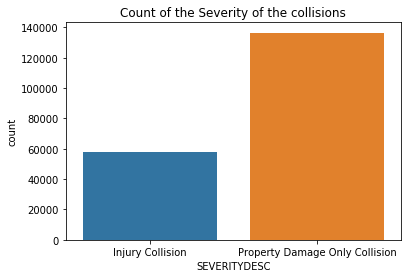

In [31]:
sns.countplot(x="SEVERITYDESC", data=df)
plt.title('Count of the Severity of the collisions')

#### <font color=blue> Convert incident date to Year Month Day of Week

In [11]:
df['INCDATE']=df['INCDATE'].str[:10]

df[['YEAR', 'MONTH','DAY']]=df["INCDATE"].str.split("/", expand=True)

df['INCDATE'] = pd.to_datetime(df['INCDATE'])

df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek

#### <font color=blue> let's find the number of person effected per year by car accident

Text(0.5, 1.0, 'Annual traffic incidents in Seattle')

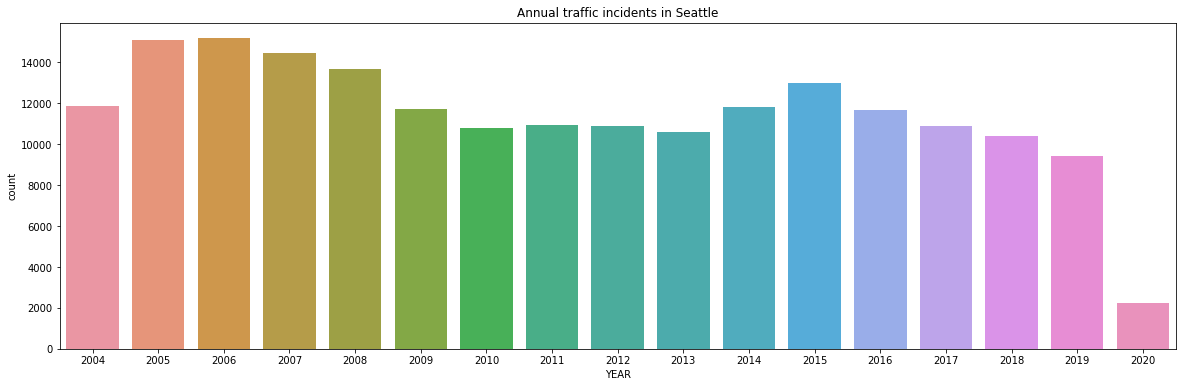

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x="YEAR", data=df)
plt.title('Annual traffic incidents in Seattle')

Text(0.5, 1.0, 'Annual traffic incidents in Seattle by Severity')

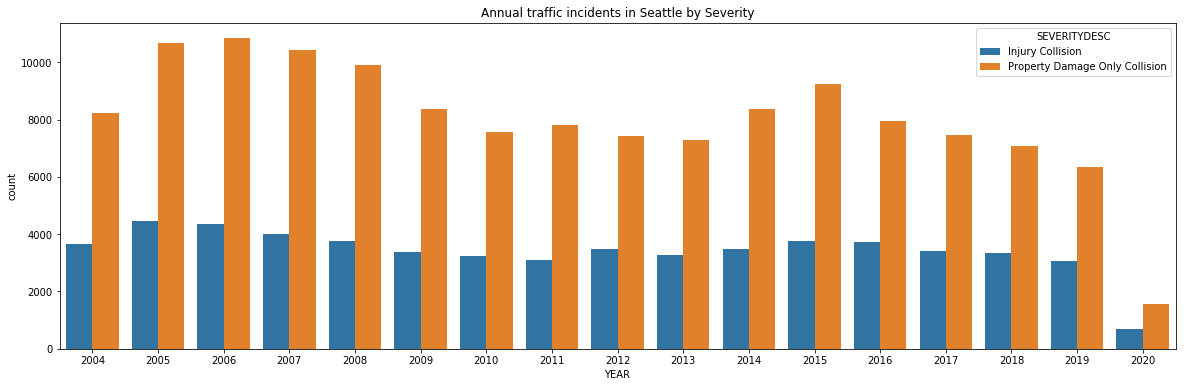

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x="YEAR", hue="SEVERITYDESC", data=df)
plt.title('Annual traffic incidents in Seattle by Severity')

#### We notice there is a considerably high amount of incidents in all the years except 2020 because the recorded incidents are only till May 2020 and not a whole year. We can also infer from the plots that no injury collisions are always more likely to happen.

#### <font color=blue> Now lets find the collision types

In [45]:
df['COLLISIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


Text(0.5, 1.0, 'Collision Type and Severity')

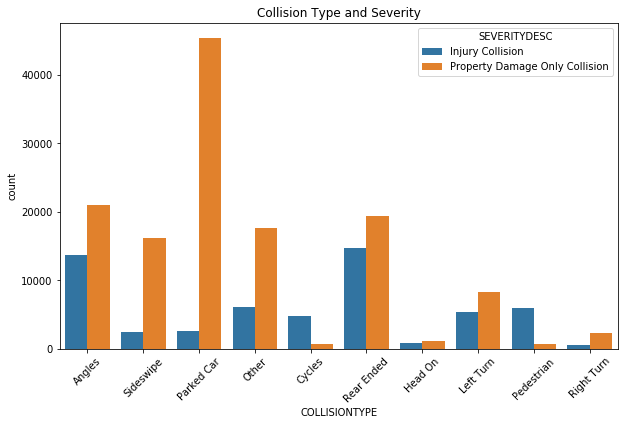

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Collision Type and Severity')

#### There is a considerable difference on the collision occurences according to collision types. Most commonly the accidents happen with parked cars, angles, sideswipe and rear ended.

#### <font color=blue> Now lets find the impact of weather condition

In [49]:
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


Text(0.5, 1.0, 'Weather and Severity')

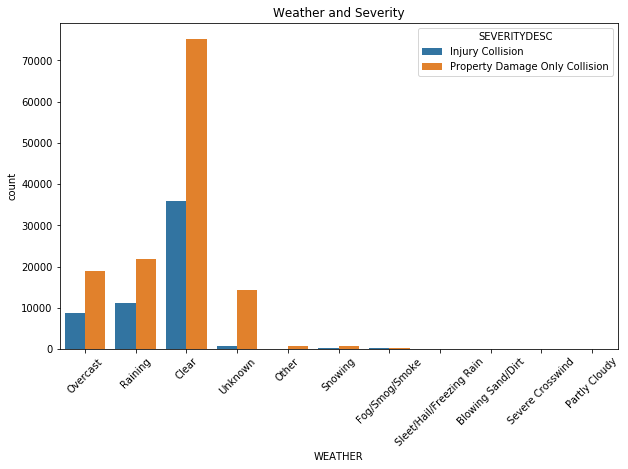

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Weather and Severity')

#### Visualizing weather conditions, we notice most incidents happened in a Clear weather. That could be because drivers inattention in clear condition. We can check the correlation between WEATHER and INATTENTIONIND(whether or not collision was due to inattention), but 85% of the data is missing which may lead to wrong inferences.

#### <font color=blue> Now lets find the impact of road condition

In [51]:
df['ROADCOND'].value_counts().sort_values(ascending=False).to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


Text(0.5, 1.0, 'Road Condition and Severity')

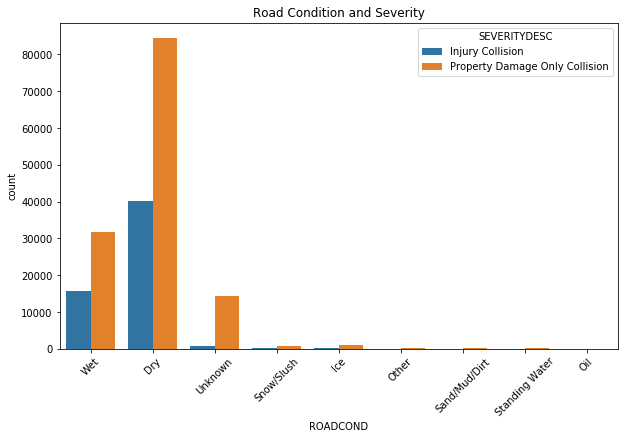

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Road Condition and Severity')

#### The most common road condition is Dry road condition followed by Wet road condition.

#### <font color=blue> Now lets find the impact of light condition

In [53]:
df['LIGHTCOND'].value_counts().sort_values(ascending=False).to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


Text(0.5, 1.0, 'Light Condition and Severity')

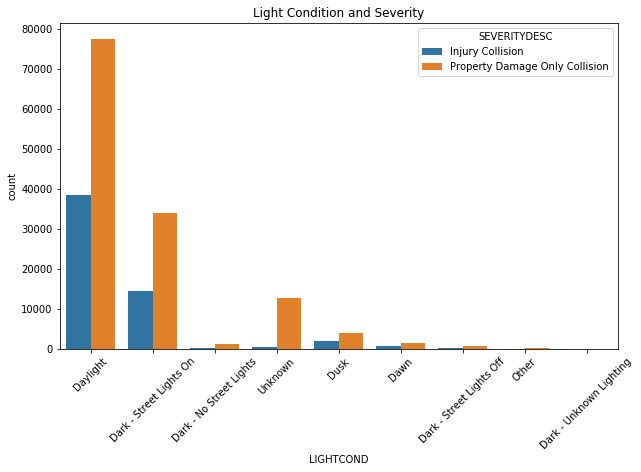

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Light Condition and Severity')

#### Visualizing impact of light conditions, we notice most incidents happened in Daylight. This again leads to the same inference we had hile visualizing impact of weather condition.

#### <font color=blue> Now lets find the impact of Driver under influence of drugs or alcohol

In [55]:
df['UNDERINFL'].value_counts().sort_values(ascending=False).to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


Text(0.5, 1.0, 'Driver under influence of drugs or alcohol and Severity')

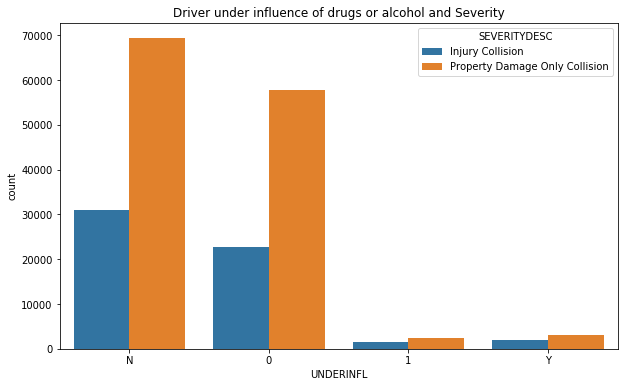

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.title('Driver under influence of drugs or alcohol and Severity')

#### It can be cleary inferred here that in most incidents, drivers were not under any influence.

#### <font color=blue> We have now visualized the impact of different features on severity. Overall, we can infer that no-injury accidents in normal driving conditions are prevalent.

#### <font color=blue> Now that we move to next steps of model building, we will choose COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL as attributes to classify SEVERITYCODE. We will use some popular machine learning algorithms (SVM, Logistic Regression, Naive Bayes and KNN) build up models to analyze their performance and predict the collision severity. But before we do so, we need to clean the data so that we have balanced predictions.

# <font color=RED> Methodology, Results, Discussion and conclusion:

As a Part of model building and prediction we eill proceed in the following manner:

#### 1. Data preparation and cleaning

We will start with Data cleaning procedure to make the dataset usable to the machine learning algorithm models. We will perform the following steps:

● Dropping irrelevant variables and attributes - Out of the 37 attributes, we will use COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL as attributes to classify SEVERITYCODE.

● Dealing with missing values - Since COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL attributes only have 3% of missing data, we will drop them.

●Treating the categorical variables with Label encoding - COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL attributes are categorical data and hence we will use label encoding.

●Train/Test split and data normalization
Now treating all attributes we will separate the independent variables to dataset A and dependent variable 'SEVERITYCODE' to dataset B. After, we will use this data to randomly pick samples and split in this ratio:

70% to train the model
30% to test the model 

Following the split we will normalize the data to make sure there is no bias.


#### 2. Classification: Modeling and Result Evaluation

We will make three models and then proceed to model evaluation. The steps will be as follows:

● KNN: Classifies unseen data through the majority of its 'neighbours'. After obtaining each model's predictions we will evaluate their accuracy, precison, f1-score, log-loss and compare and discuss the results.

● Logistic Regression: Classifies data by estimating the probability of classes.

● Decision Tree: Classifies by breaking down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

● Model Evaluation using test set.

● Creating confusion matrices.


#### 3. Discussion and Conclusion

After obtaining the results and evaluating them, we will draw inferences on our observations. Finally, will conclude with the results of our analysis.

#### <font color=blue> Let's start with the Data preparation and cleaning

### <font color=red> 1. Data preparation and cleaning:

#### <font color=blue> 1.1. Choosing only the relevant attributes and dealing with missing values.

In [59]:
data = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]
data = data.dropna()
data.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,0,1
2,Parked Car,Overcast,Dry,Daylight,0,1
3,Other,Clear,Dry,Daylight,N,1
4,Angles,Raining,Wet,Daylight,0,2


#### <font color=blue> 1.2. Checking the dtypes

In [61]:
data.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
SEVERITYCODE      int64
dtype: object

#### <font color=blue> 1.3. Converting Categorical features to numerical values by label encoding

In [62]:
data['UNDERINFL'].replace(to_replace=['N','Y','0'], value=[0,1,0],inplace=True)
data['UNDERINFL'].value_counts()

0    180219
1      9097
Name: UNDERINFL, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

attributes = data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for attribute in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    attributes[attribute] = attributes[attribute].astype('|S') 
    attributes[attribute] = LabelEncoder().fit_transform(attributes[attribute])

attributes.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


#### Defining the independent variable X -> Attributes and dependent variable Y -> Severity Code

In [65]:
X = attributes
y = data['SEVERITYCODE'].values

#### <font color=blue> 1.4. Train/Test split and data normalization

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
109717,0,1,0,5,0
9615,7,1,0,5,0
133991,3,1,0,5,0
76012,5,1,0,5,0
97913,9,10,7,8,0


In [67]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]
X_test[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.90028023, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559],
       [ 0.18231884, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [ 0.90028023,  0.32670431, -0.71028447,  0.93363748, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559]])

### <font color=Red> 2. Classification: Modeling and Result Evaluation

#### <font color=blue> 2.1. K - Nearest Neighbors(KNN)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

#### <font color= blue> 2.2. Logistic Regression (LR)

In [71]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.0001, solver='liblinear')
LR_model.fit(X_train, y_train)
LR_model

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### <font color=blue> 2.3. Decision Tree (DT)

In [72]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train, y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### <font color = Blue> 2.4. Model Evaluation using Test set

In [76]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# KNN Model
yhat = KNN_model.predict(X_test)
yhat_knn = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(jaccard,2), round(f1_score_knn,2), round(precision_knn,2)]

# Logistic regression Model
yhat_proba = LR_model.predict_proba(X_test)
yhat = LR_model.predict(X_test)
yhat_lr = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

# Decision tree Model
yhat = DT_model.predict(X_test)
yhat_tree = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(jaccard,2), round(f1_score_tree,2), round(precision_tree,2)]


Model_eval_report = pd.DataFrame(data=np.array([knn_report,  lr_report, tree_report]), 
                      columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
Model_eval_report

,Algorithm,Jaccard,F1-score,Precision
0,KNN,0.74,0.67,0.74
1,Logistic Regression,0.7,0.58,0.68
2,Decision Tree,0.75,0.69,0.78


#### <font color = Blue> For all three models Jaccard score is above 70%. The highest accuracy model is the Decision Tree Classifier. 

#### <font color = Blue> 2.5. Creating Confusion Matrices for result evaluation:

#### KNN Confusion Matrix:

In [77]:
from sklearn.metrics import confusion_matrix

print('KNN Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_knn).ravel()
(tn, fp, fn, tp)

KNN Confusion Matrix


(38708, 999, 13974, 3114)

#### Logistic Regression Confusion Matrix: 

In [79]:
print('Logistic Regression Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_lr).ravel()
(tn, fp, fn, tp)

Logistic Regression Confusion Matrix


(39655, 52, 16999, 89)

#### Decision Tree Confusion Matrix:

In [78]:
print('Decision Tree Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_tree).ravel()
(tn, fp, fn, tp)

Decision Tree Confusion Matrix


(39170, 537, 13755, 3333)

From the Confusion Matrices e are able to visulaize the number of samples that are classified correctly as well as incorrectly for all the models.

### <font color=Blue> 3. Discussion and Conclusion

So, here in this entire model building, evaluation and analysis we evaluated the performance of 3 machine learning algorithms on the Seattle Collision dataset to predict the severity of an accident knowing the weather and road conditions. We had primarily categorical data to deal with and label encoding became very handy while handling the data. The three models performed very similary, but Decision Tree was found to be the best model. 

However, we chose only 5 attributes out of 37 based upon our initial analysis of data in the Data understandng part. We can however go on to choose further attributes in order to make more consideration while developing the models. We can also look into hyper parameterization techniques to develop a much better model. All in all this was very enlightening and the models we developed had a fair accuracy.